<a href="https://colab.research.google.com/github/nasyawa/PCVK_GANJIL_2023/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL11
#### MetodeDeteksiObjek: TemplateMatching,EdgeDetection,CornerDetection,GridDetection,ContourDetection

**Nasyawa Ramadhia - 2141720011**

### **E. Pengayaan Materi KTP**

1. Siapkan dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Muat 2 library, tahap persiapan

In [8]:
import cv2
import os
from google.colab.patches import cv2_imshow

3. Menambahkan kode lokalisasi dataset dan melakukan pembacaan file name di dalam direktori dataset.

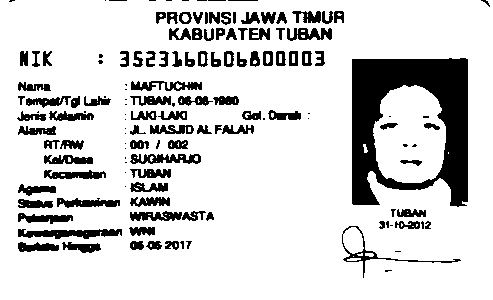

In [12]:
#Lokasi Plat
src = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp3.png')

# 4. Masih pada looping file direktori,
# terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi
blurred = cv.GaussianBlur(src, (5,5), 0.5)

# 5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise
# dan lanjutkan dengan binerisasi citra (thresholding)
#Ubah Grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN,(1,1)))
cv2_imshow(erode)

7. Ekstrasi Fitur

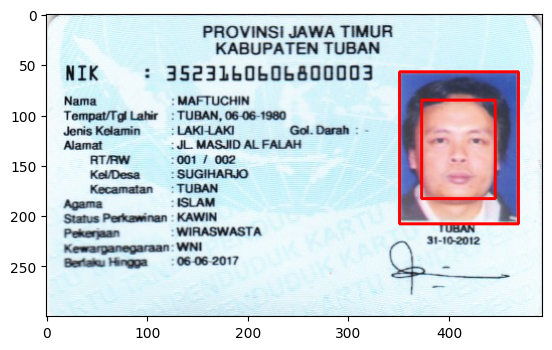

In [17]:
# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
src_rgb = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src_rgb)
plt.show()

**TUGAS PRAKTIKUM**

Kelompok 3
- Dhoriffito Diansyah Putra (11)
- Josafat Pratama Susilo (15)
- Maidy Putri Joshi (18)
- Nasyawa Ramadhia Kirana (22)
- Novita Dwi Rahmadani (23)

KTP Arief Wijaya

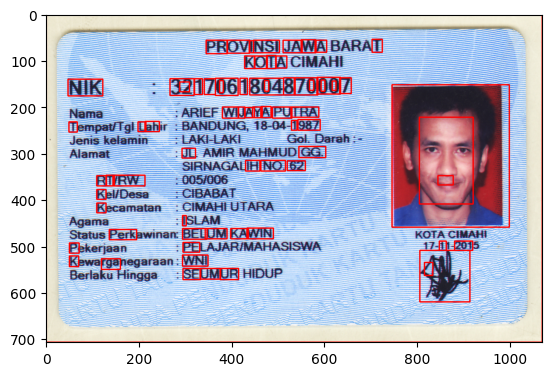

In [18]:
ktp_tugas = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp2.png')

blurred = cv.GaussianBlur(ktp_tugas, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 30 and w >= 5 and float(ras) <= 2:
      cv.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 20 and w >= 5 and float(ras) <= 3:
      cv.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# cv.drawContours(ktp, contours, -1, (0, 255, 0), 2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv.cvtColor(ktp_tugas, cv.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()